<a href="https://colab.research.google.com/github/deepshikhaa07/Machine-Learning/blob/main/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB EXPERIMENT - TEMPLATE**

**Topic:- Classifiers**

**Name- Deepshiha Singh**

**Roll no.- 1**

*IMPORTING LIBRARIES*

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

*IMPORTING DATASET TECHNIQUES*

In [5]:
#importing dataset from colab files

data = pd.read_csv('/content/sample_data/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# importing dataset from drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls /content/drive/MyDrive/Iris.csv

/content/drive/MyDrive/Iris.csv


In [8]:
data=pd.read_csv('/content/drive/MyDrive/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# importing dataset from github

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data1 = pd.read_csv(url,index_col=0)
data1

,3.5,1.4,0.2,Iris-setosa
5.1,,,,
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica


*EXPLORATORY ANALYSIS OF DATASET*

In [10]:
# describing data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
data.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [13]:
data.shape

(150, 6)

In [14]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
data.count()

,0
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [16]:
# checking null values
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<Axes: xlabel='Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species'>

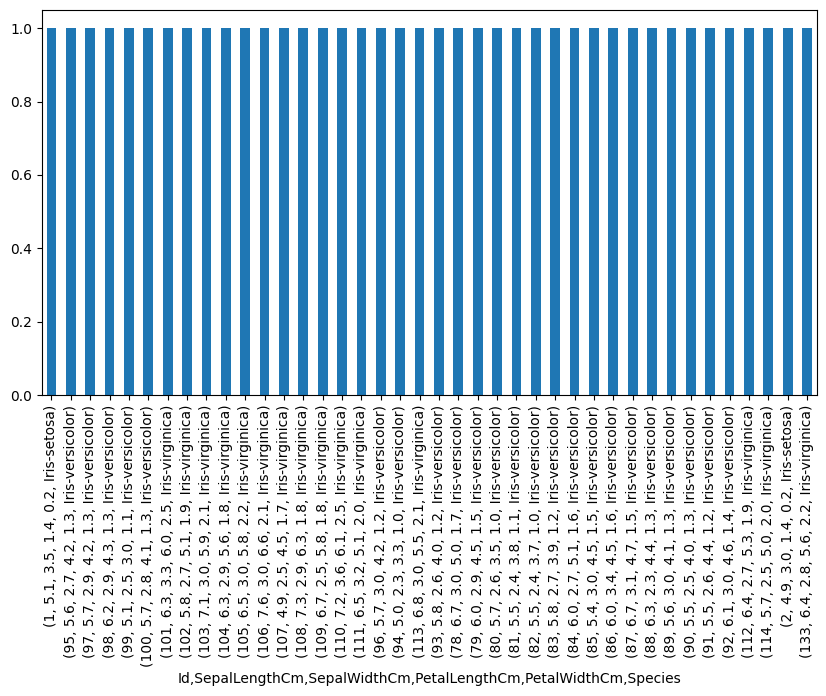

In [17]:
data.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

*CLASSIFY AND SPLIT DATA*

In [18]:
# classifying data
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
data['Species']=data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

<ipython-input-19-6a0bc4248cac>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species']=data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [20]:
#show data
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [21]:
# splitting dataset
x_train, x_test, y_train, y_test = train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'], train_size=0.2)

In [22]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
49,5.0,3.3,1.4,0.2
13,4.3,3.0,1.1,0.1
105,7.6,3.0,6.6,2.1
129,7.2,3.0,5.8,1.6
57,4.9,2.4,3.3,1.0
108,6.7,2.5,5.8,1.8
58,6.6,2.9,4.6,1.3
84,5.4,3.0,4.5,1.5
68,6.2,2.2,4.5,1.5
113,5.7,2.5,5.0,2.0


In [23]:
y_train

,Species
49,1
13,1
105,3
129,3
57,2
108,3
58,2
84,2
68,2
113,3


In [24]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
133,6.3,2.8,5.1,1.5
75,6.6,3.0,4.4,1.4
19,5.1,3.8,1.5,0.3
46,5.1,3.8,1.6,0.2
...,...,...,...,...
63,6.1,2.9,4.7,1.4
33,5.5,4.2,1.4,0.2
109,7.2,3.6,6.1,2.5
121,5.6,2.8,4.9,2.0


In [25]:
y_test

,Species
14,1
133,3
75,2
19,1
46,1
...,...
63,2
33,1
109,3
121,3


*CLASSIFIERS*

In [26]:
# 1) linear regression

lr = LinearRegression()

#fitting the model on the training data and try to predict the X_test
iris_model = lr.fit(x_train, y_train)
predictions = iris_model.predict(x_test)


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9198346974680647

In [33]:
np.sqrt(((predictions - y_test)**2).mean())

0.22962009389302504

In [34]:
# 2) logistic regression

modell=linear_model.LogisticRegression(max_iter=120)
modell.fit(x_train,y_train)

LogisticRegression(max_iter=120)

In [35]:
y_pred=modell.predict(x_test)
y_pred

array([1, 2, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, 3,
       2, 2, 2, 1, 1, 1, 3, 2, 2, 3, 3, 2, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2,
       1, 3, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 3, 1, 2, 1, 1, 2, 2, 1, 3, 2,
       3, 2, 2, 3, 3, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 1, 2, 1, 3, 3, 3])

In [36]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
133,6.3,2.8,5.1,1.5
75,6.6,3.0,4.4,1.4
19,5.1,3.8,1.5,0.3
46,5.1,3.8,1.6,0.2
...,...,...,...,...
63,6.1,2.9,4.7,1.4
33,5.5,4.2,1.4,0.2
109,7.2,3.6,6.1,2.5
121,5.6,2.8,4.9,2.0


In [37]:
modell.score(x_test, y_test)

0.95

<Axes: >

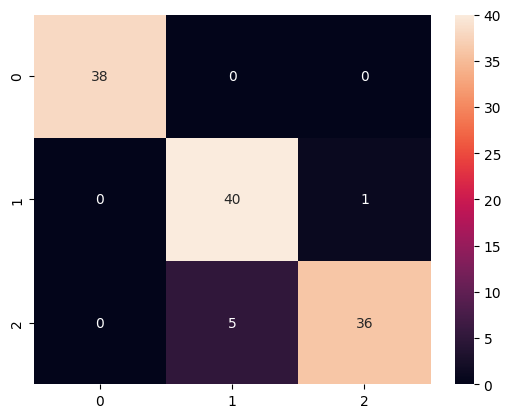

In [38]:
# heatmap of confusion matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

<Axes: >

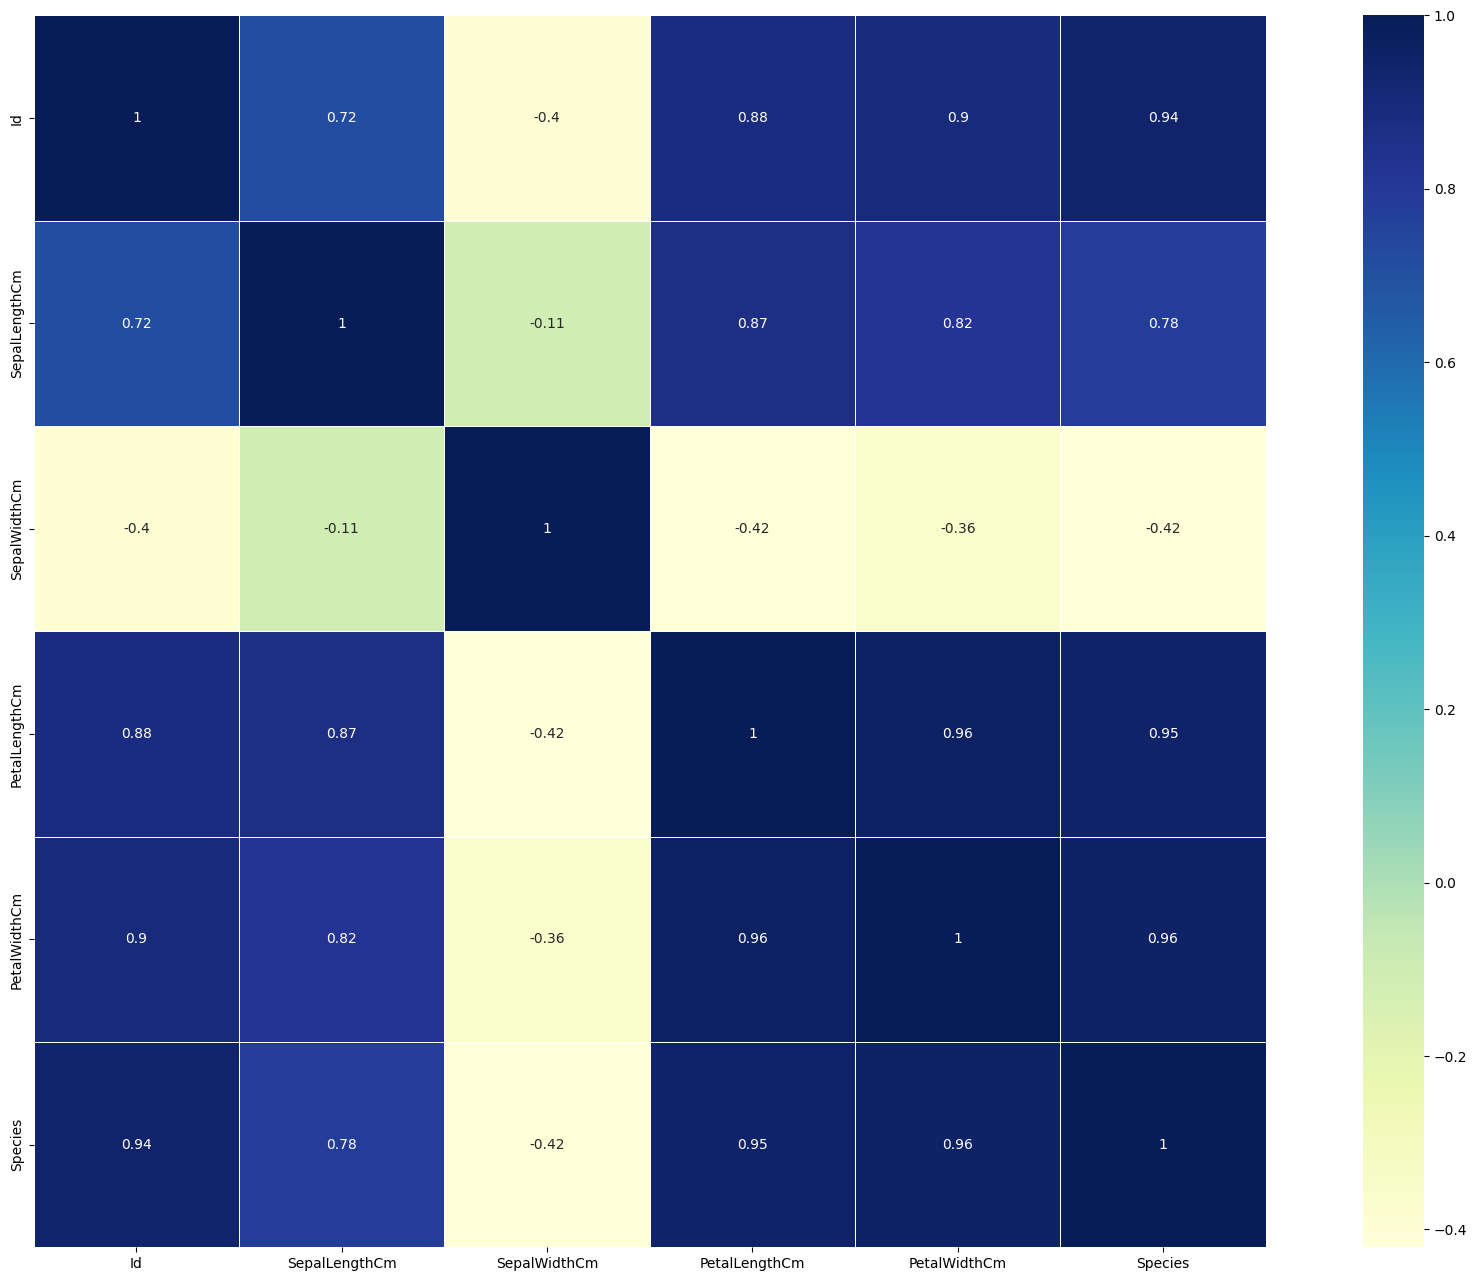

In [39]:
# correlation

f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(data.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

In [44]:
# 2) svm on Iris

clf_svm = SVC(kernel = 'linear')
clf_svm.fit(x_train,y_train)

SVC(kernel='linear')

In [45]:
y_pred_svm = clf_svm.predict(x_test)
y_pred_svm

array([1, 2, 2, 1, 1, 3, 2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, 3,
       2, 2, 2, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2,
       1, 3, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 3, 1, 2, 1, 1, 2, 2, 1, 3, 2,
       3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2,
       2, 3, 3, 2, 1, 2, 1, 3, 3, 3])

In [46]:
svm_score=metrics.accuracy_score(y_test, y_pred_svm)
svm_score

0.9333333333333333

In [47]:
# 3) Decision tree on  Iris

clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, min_samples_leaf=5)

In [48]:
clf_entropy.fit(x_train, y_train)
clf_entropy

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       random_state=100)

In [49]:
y_pred_dtree=clf_entropy.predict(x_test)
y_pred_dtree

array([1, 3, 2, 1, 1, 3, 2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, 3,
       2, 2, 2, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 1, 1, 2, 3, 3, 2, 3, 2,
       1, 3, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 3, 1, 2, 1, 1, 2, 2, 1, 3, 2,
       3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 2, 1, 3, 2, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 1, 2, 1, 3, 2, 3])

In [50]:
# accuracy

acc_dtree=metrics.accuracy_score(y_test, y_pred_dtree)
acc_dtree

0.9333333333333333

<Axes: >

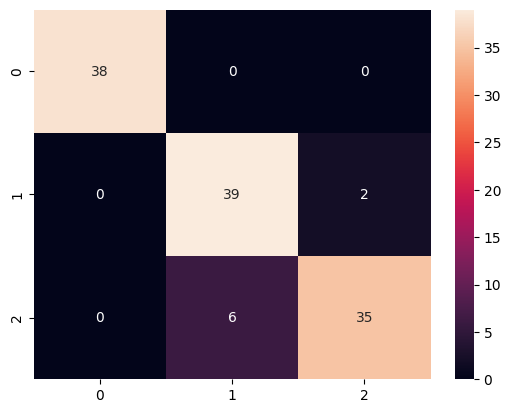

In [51]:
# heatmap of confusion matrix

cm_dtree=confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm_dtree, annot=True)

In [52]:
rep=classification_report(y_test, y_pred_dtree)
rep

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        38\n           2       0.87      0.95      0.91        41\n           3       0.95      0.85      0.90        41\n\n    accuracy                           0.93       120\n   macro avg       0.94      0.93      0.93       120\nweighted avg       0.94      0.93      0.93       120\n'

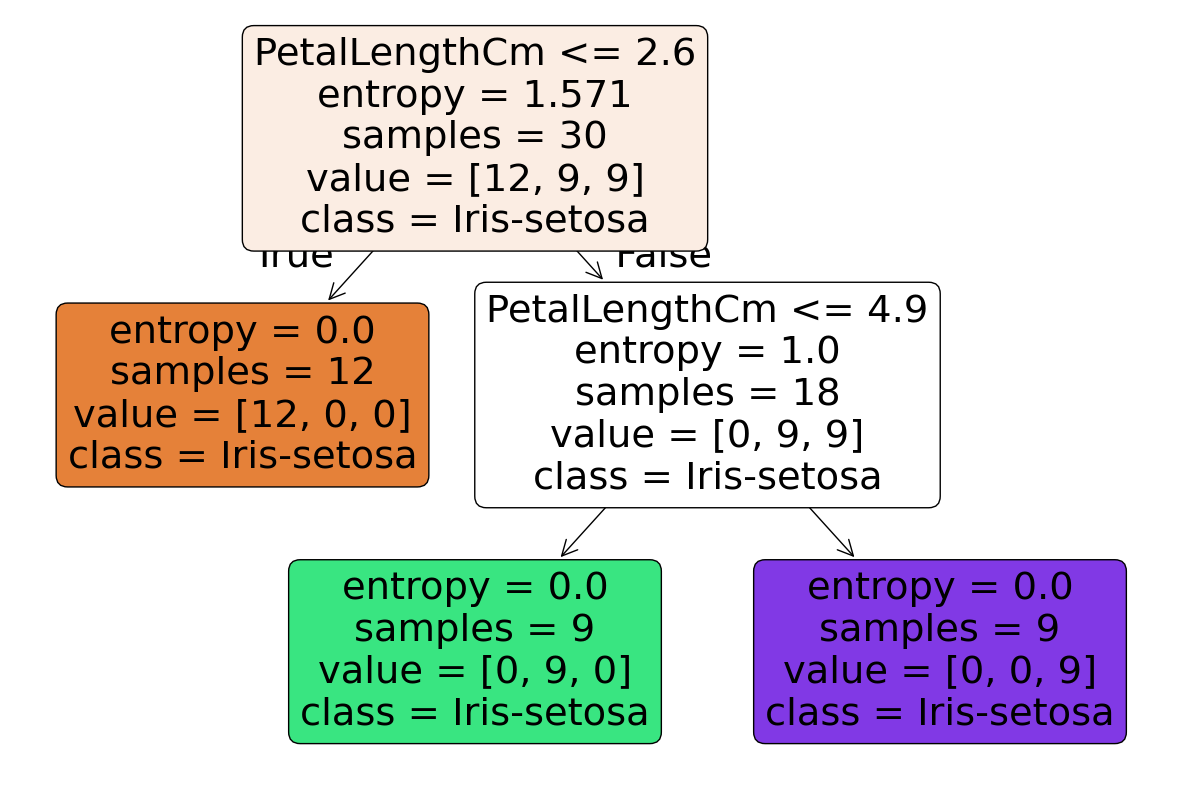

In [53]:
# plot of decision tree

data['Species']=data['Species'].replace({1:'Iris-setosa', 2:'Iris-versicolor', 3:'Iris-virginica'})
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy, filled=True, feature_names=x_train.columns, class_names= data['Species'], rounded=True)
plt.show()